In [69]:
from thinkdsp import  CosSignal, SinSignal,decorate
import os
cos_sig=CosSignal(freq=440,amp=1.0,offset=0)
sin_sig=SinSignal(freq=880,amp=0.5,offset=0)


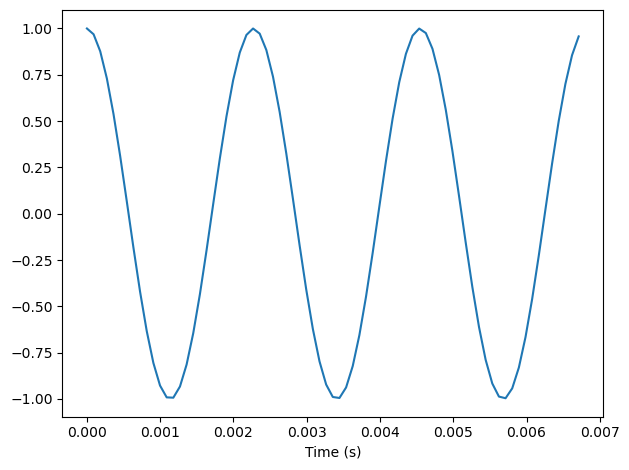

In [70]:
cos_sig.plot()
decorate(xlabel='Time (s)')

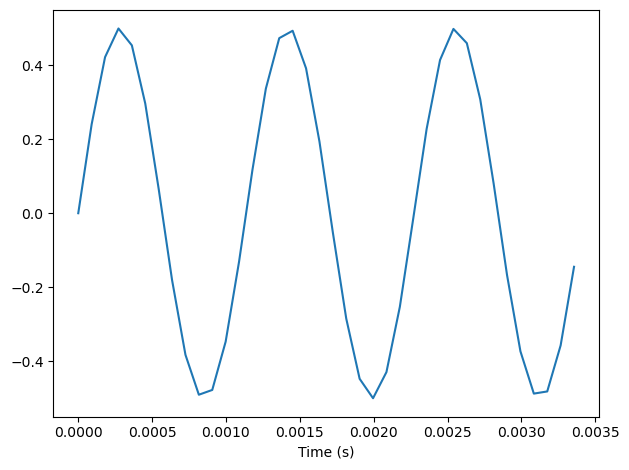

In [71]:
sin_sig.plot()
decorate(xlabel='Time (s)')

In [72]:
mix =sin_sig+cos_sig
mix

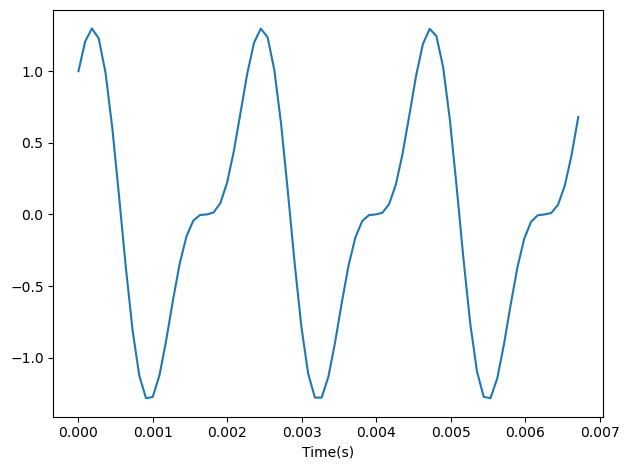

In [73]:
mix.plot()
decorate(xlabel="Time(s)")

In [74]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave

In [75]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

In [76]:
wave.make_audio()


In [77]:
print('Number of samples', len(wave.ys))
print('Timestep in ms', 1 / wave.framerate * 1000)


Number of samples 5512
Timestep in ms 0.09070294784580499


In [78]:
period = mix.period
segment = wave.segment(start=0, duration=period*3)
period

0.0022727272727272726

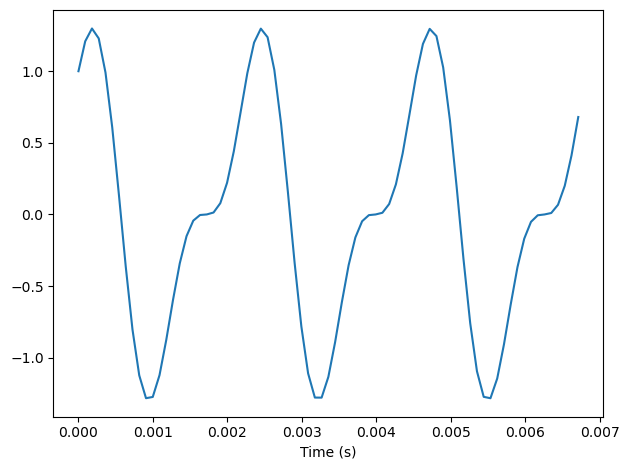

In [79]:
segment.plot()
decorate(xlabel='Time (s)')

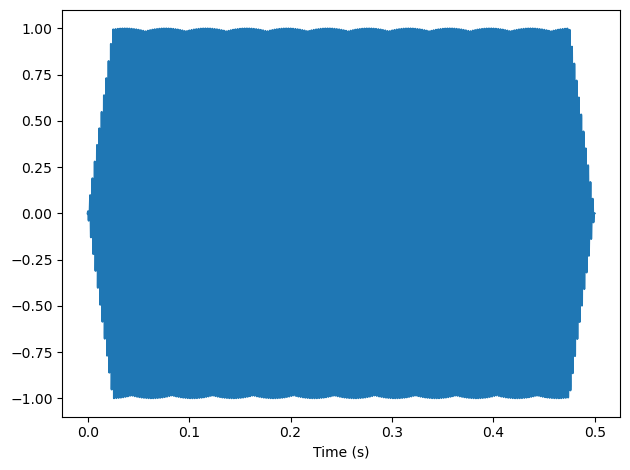

In [80]:
wave.normalize()
wave.apodize()
wave.plot()
decorate(xlabel='Time (s)')

In [81]:
wave.write('temp.wav')


Writing temp.wav


In [82]:
from thinkdsp import play_wave

play_wave(filename='temp.wav', player='aplay')

In [83]:
filename = '92002__jcveliz__violin-origional.wav'

if not os.path.exists(filename):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

In [84]:
from thinkdsp import read_wave

wave = read_wave(filename)

In [85]:
wave.make_audio()

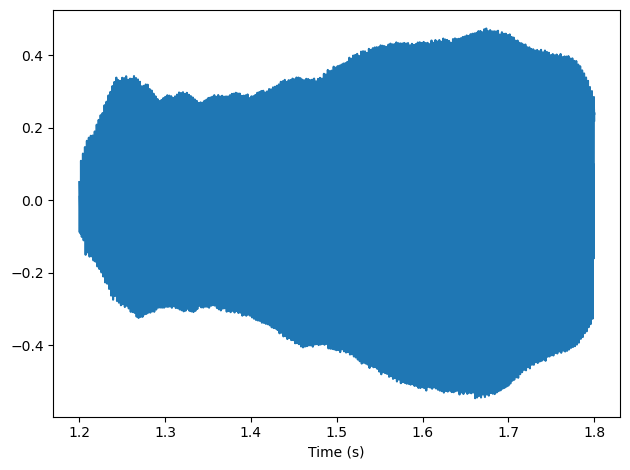

In [86]:
start = 1.2
duration = 0.6
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel='Time (s)')

In [87]:
spectrum = segment.make_spectrum()


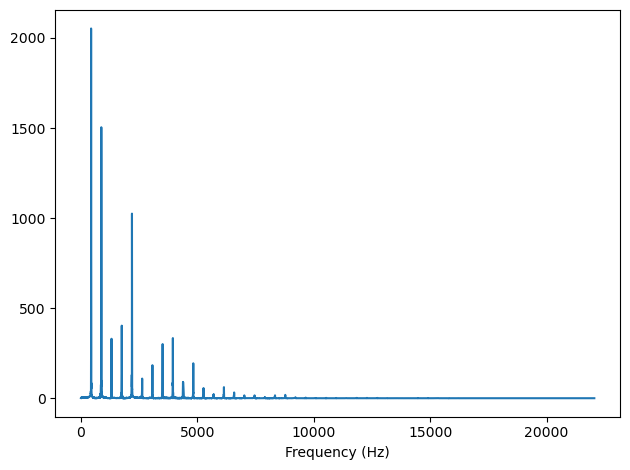

In [88]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

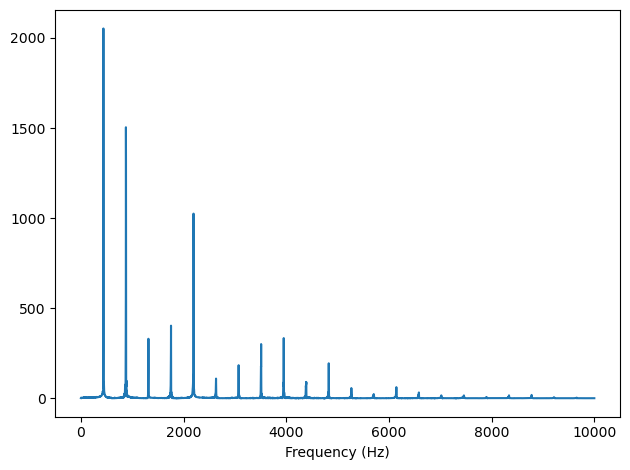

In [89]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [90]:
spectrum.low_pass(3000)

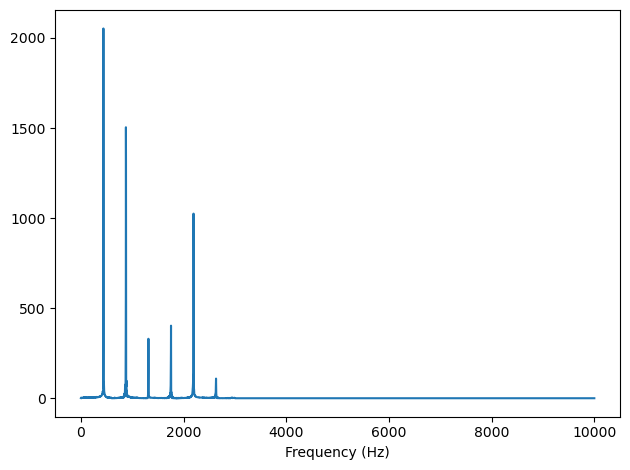

In [91]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [92]:
filtered = spectrum.make_wave()

In [93]:
filtered.normalize()

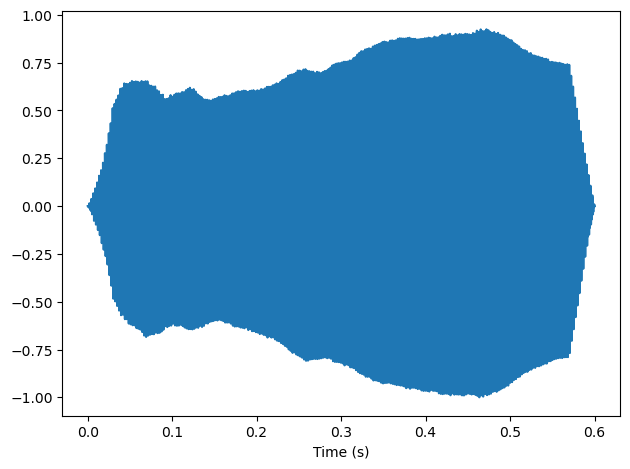

In [94]:
filtered.apodize()
filtered.plot()
decorate(xlabel='Time (s)')

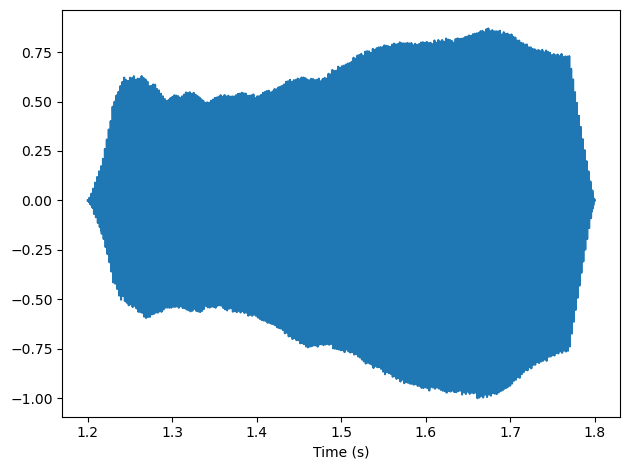

In [95]:
segment.normalize()
segment.apodize()
segment.plot()
decorate(xlabel='Time (s)')

In [96]:
segment.make_audio()

In [97]:
filtered.make_audio()

In [98]:
import matplotlib.pyplot as plt
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    plt.show()
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [99]:
from ipywidgets import interact, fixed

wave = read_wave('92002__jcveliz__violin-origional.wav')
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…